# Tiltshift

Autor: Almir Soares Firmo Filho

O objetivo deste notebook é mostrar como desenvolver um programa em Python para criar um efeito de 'tiltshift' ou desfocamento seletivo de uma imagem. Esse efeito é bastante utilizado, por exemplo, para levar a atenção do leitor à um determinado ponto de um artigo de revista, desfocando tudo que está ao redor do texto de interesse.

Neste notebook vamos partir da seguinte imagem:

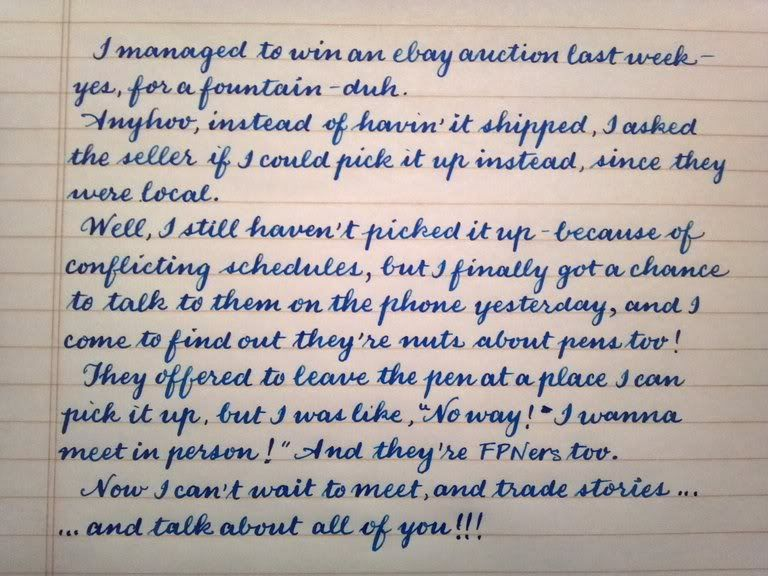

In [1]:
from IPython.display import Image

Image(filename='handwriting.jpg')

Vamos à implementação:

In [2]:
# Importar OpenCV
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definir função 'dummy'
def passFunction(x):
    pass

In [4]:
# Importar imagem e criar duas imagens a partir da imagem de base: sem borramento e com borramento
image = cv.imread('handwriting.jpg', cv.IMREAD_COLOR)

image1 = image.copy()
image2 = cv.blur(image, (5,5))

In [5]:
# Creação das trackbars
window_title = 'Tilted image'

d_val_max = 100
trackbar_d = 'Suavidade'
cv.createTrackbar(trackbar_d, window_title , 0, d_val_max, passFunction)

trackbar_L = 'Tamanho'
cv.createTrackbar(trackbar_L, window_title, 0, image.shape[0], passFunction)

trackbar_C = 'Centro'
cv.createTrackbar(trackbar_C, window_title, int(image.shape[0]/2), int(image.shape[0]), passFunction)

In [6]:
# Criar variável para inicializar janela pós processada
first_pass = 1

É possível vermos a forma da função que utilizaremos para superpor as duas imagens da forma como queremos, função essa que demos o nome de $\alpha(x)$.
Podemos fazer uma iteração com parâmetros estáticos para mostrar o funcionamento, antes de mostrar como seria a parte principal do programa:

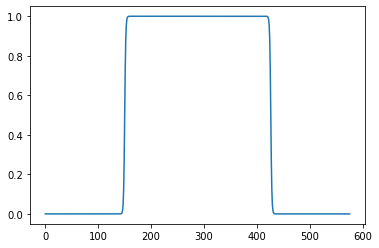

In [12]:
L1 = 150
L2 = image.shape[0]-L1
C = 0
d = 2

# Criação da função alpha(x)
x = np.arange(0,image1.shape[0],1)
alpha = (np.tanh((x-L1-C)/d) - np.tanh((x-L2-C)/d))/2

# Plot da função alpha(x)
_ = plt.plot(x,alpha)
plt.show()

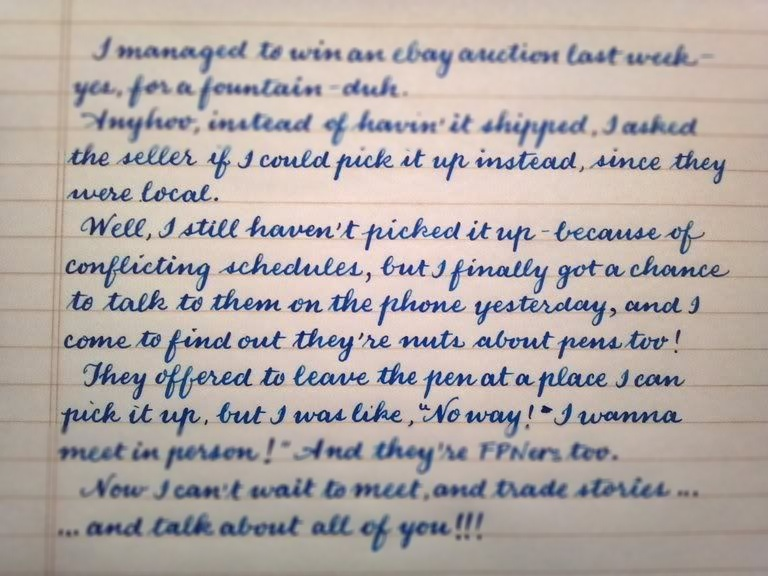

In [13]:
# Ajuste necessário para operar sobre a matriz da imagem
alpha = alpha.reshape(-1,1,1)
alpha_mat = np.tile(alpha,(1,image1.shape[1],image1.shape[2]))
beta_mat = 1-alpha_mat

# Criação da imagem de saída a partir de alpha e das imagens de entrada (com e sem borramento)
tilted = np.multiply(alpha_mat,image1) + np.multiply(beta_mat,image2)
tilted = tilted.astype(np.uint8)

# Salvando a imagem processada
cv.imwrite('imagem_tiltshift.jpg',tilted)

# Exibição da nova imagem
Image(filename='imagem_tiltshift.jpg')

É possível notar que, diferente do centro da imagem, as regiões mais próximas às bordas verticais estão desfocadas, pois é nesse ponto que a contribuíção de $\alpha(x)$ é pequena e, consequentemente, $1-\alpha(x)$ é grande, dando destaque à imagem desfocada pelo filtro da média "por cima" da imagem original.

Por fim, a função principal do programa rodaria em loop e nela poderíamos ajustar em tempo real o efeito antes de salvar a imagem final:

In [ ]:
# Criar função principal
while(True):
    cv.namedWindow(window_title)
    # Exibir imagem sem borramento se for a primeira passagem do programa
    if first_pass == 1:
        cv.imshow(window_title,image)
    else:
        # Exibir imagem com borramento após a primeira passagem
        cv.imshow(window_title,tilted)

    # Caso seja pressionado o botão ESC sair do programa
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

    # L é o tamanho da parte borrada da imagem
    L = cv.getTrackbarPos(trackbar_L,window_title)
    
    # Definição de L1 e L2 que dizem respeito à linha onde o borramento termina com relação à linha 0
    L1 = L/2
    L1 = max(0,L1)
    L2 = image.shape[0]-L1

    # Definição de d como suavidade do borramento
    d = cv.getTrackbarPos(trackbar_d,window_title)
    
    # Ajuste do valor mínimo de d para não dividir por zero
    d = 0.01+d
    
    # Definição do centro do foco, começando na linha 0 e indo até a última linha
    C = cv.getTrackbarPos(trackbar_C,window_title)
    C = C - image.shape[0]/2
    if C < 0:
        C = max(C,-L1)
    else:
        C = min(C,L1)

    # Criação da função alpha(x)
    x = np.arange(0,image1.shape[0],1)
    alpha = (np.tanh((x-L1-C)/d) - np.tanh((x-L2-C)/d))/2

    # Plot da função alpha(x)
    _ = plt.plot(x,alpha)
    plt.show()

    # Ajuste necessário para operar sobre a matriz da imagem
    alpha = alpha.reshape(-1,1,1)
    alpha_mat = np.tile(alpha,(1,image1.shape[1],image1.shape[2]))
    beta_mat = 1-alpha_mat
    
    # Criação da imagem de saída a partir de alpha e das imagens de entrada (com e sem borramento)
    tilted = np.multiply(alpha_mat,image1) + np.multiply(beta_mat,image2)
    tilted = tilted.astype(np.uint8)

    # Modificar a variável após primeira passagem
    first_pass = 0

# Fechar as janelas e salvar a imagem processada ao sair do programa
cv.imwrite('tiltshift.jpg',tilted)
cv.destroyAllWindows()

A interface gerada ao rodar a função acima possui as 3 barras de seleção (suavidade do borramento, tamanho do borramento e centro do foco) e o preview da imagem:

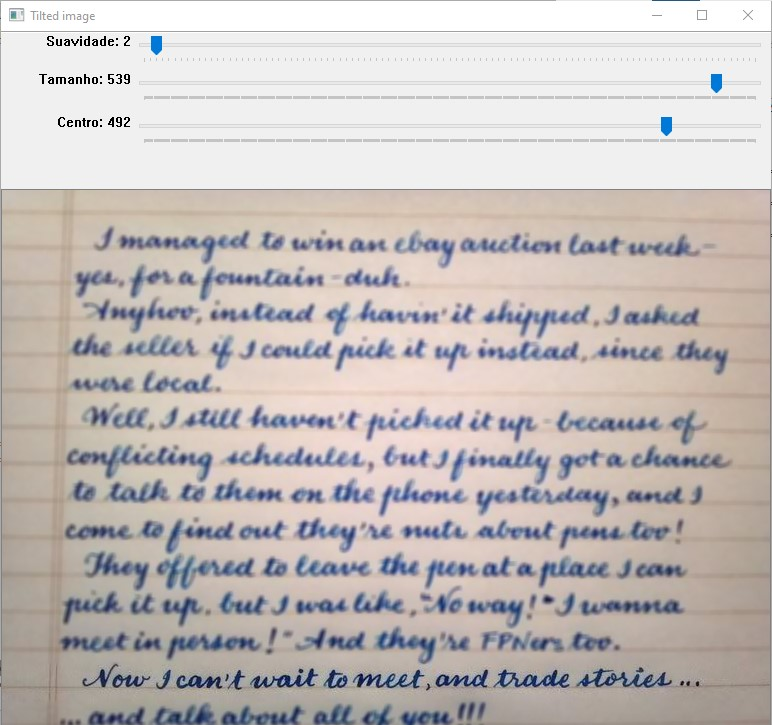

In [17]:
Image(filename='interface_tiltshift.jpg')

A imagem final produzida pela interface com as barras de seleção ficou como segue:

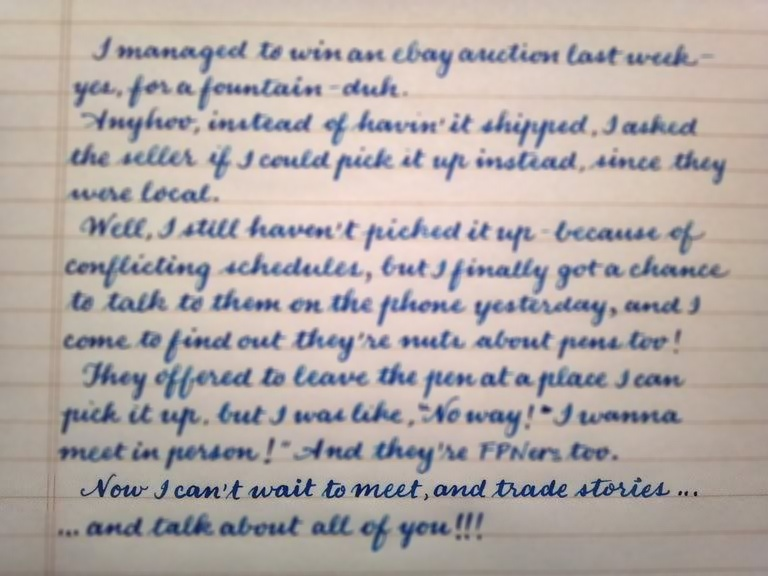

In [15]:
Image(filename='tiltshift.jpg')